**Useful Imports**

In [41]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import csv
import plotly.graph_objects as go
import PIL as ThePIL

**Variable Declaration**

In [42]:
INFO = 1 # For debugging

# Change path to find nifti files on local computer
data = []
with open('scans.csv', newline='') as scanfile:
    reader = csv.DictReader(scanfile)
    for row in reader:
        dataRow = [ row['file_name'], float(row['rg_value']), [], 0, 0, 0, 0 ]
        data.append(dataRow)

**Extract Images**

In [43]:
idx = 0
for d in data:
    data[idx][2] = np.asarray(nb.load(d[0]).dataobj)
    idx += 1


**Plot Images**

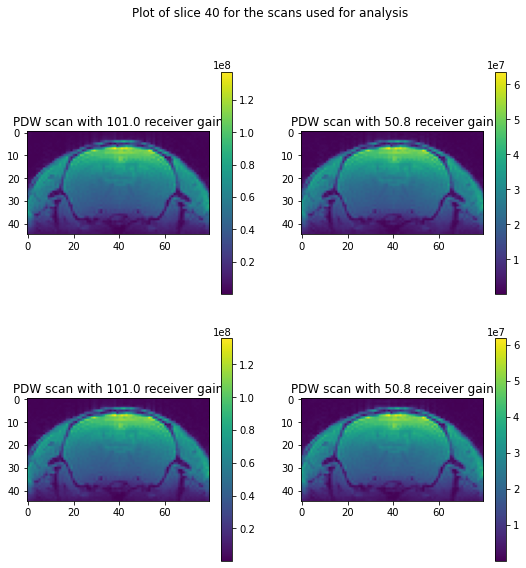

In [44]:
slice = 40 # Adjust this to change slice plotted

# Print preview of 4 scans with the various receiver gain
fig, frame = plt.subplots(2, 2, figsize=(9,9))
z1 = np.rot90(data[0][2][:,slice,:])
pos1 = frame[0, 0].imshow(z1)
frame[0, 0].set_title("PDW scan with {} receiver gain".format(data[0][1]))
fig.colorbar(pos1, ax=frame[0,0])

z2 = np.rot90(data[1][2][:,slice,:])
pos2 = frame[1, 0].imshow(z2)
frame[1, 0].set_title("PDW scan with {} receiver gain".format(data[1][1]))
fig.colorbar(pos2, ax=frame[1,0])

z3 = np.rot90(data[2][2][:,slice,:])
pos3 = frame[0, 1].imshow(z3)
frame[0, 1].set_title("PDW scan with {} receiver gain".format(data[2][1]))
fig.colorbar(pos3, ax=frame[0,1])

z4 = np.rot90(data[3][2][:,slice,:])
pos4= frame[1, 1].imshow(z4)
frame[1, 1].set_title("PDW scan with {} receiver gain".format(data[3][1]))
fig.colorbar(pos4, ax=frame[1,1])
fig.suptitle("Plot of slice " + str(slice) + " for the scans used for analysis")
plt.show()

**Averaging the images**

In [82]:
#Averaging the images with the same receiver gain

#ims = np.array([np.array(im) for im in ims])

img_101 = np.array([data[0][2], data[1][2]])
img_50 = np.array([data[2][2], data[3][2]])
img_50average = np.average(img_50,axis=0)
img_101average = np.average(img_101,axis=0)
img_50average.shape


#Computing the ratio of the two resulting images 

#Ploting the resulting ratio image 

#Get the mean of that image 





(80, 90, 45)

**Ploting the averaged images**

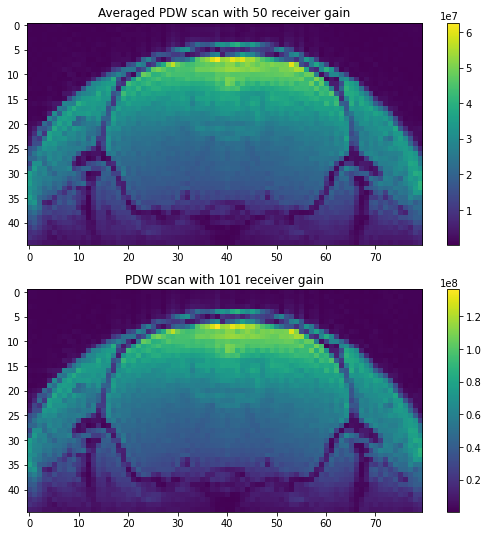

In [97]:
fig, frame = plt.subplots(2, figsize=(9,9))
y1 = np.rot90(img_50average[:,slice,:])
pos5 = frame[0].imshow(y1)
frame[0].set_title("Averaged PDW scan with 50 receiver gain")
fig.colorbar(pos5, ax=frame[0])

y2 = np.rot90(img_101average[:,slice,:])
pos6 = frame[1].imshow(y2)
frame[1].set_title("PDW scan with 101 receiver gain")
fig.colorbar(pos6, ax=frame[1])
plt.show()

**Computing the Ratio**

In [98]:
img_ratio = img_50average / img_101average
img_ratio.shape

(80, 90, 45)

**Plotting the ratioed image**

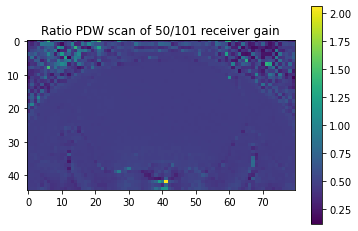

In [106]:
z1 = np.rot90(img_ratio[:,slice,:])
pos7 = plt.imshow(z1)
plt.colorbar(pos7)
plt.title("Ratio PDW scan of 50/101 receiver gain")
plt.show()

**Averaging the ratios**

In [107]:
np.mean(img_ratio)

0.47804945011767097

We can compare these results with the one found on Cedric's branch. They are very similar.